In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
h=[20,40,60,80,100]
data=[np.array([int(f) for f in open(str(h[i])+'w.txt','r')]) for i in range(len(h))]
datat=[np.array([float(f) for f in open(str(h[i])+'t.txt','r')]) for i in range(len(h))]
data,datat

([array([26, 26, 26, ...,  3,  3,  3]),
  array([63, 63, 63, ...,  3,  3,  5]),
  array([131, 131, 131, ...,   7,   6,   7]),
  array([192, 159, 159, ...,   3,   3,   3]),
  array([224, 224, 224, ...,   3,   3,   3])],
 [array([0.01053012]),
  array([0.01051507]),
  array([0.01052]),
  array([0.01052753]),
  array([0.01050303])])

In [4]:
data[3][0]=159
data[1][25]=63

In [5]:
'''print(*data[1])
data[1][25:30]'''

'print(*data[1])\ndata[1][25:30]'

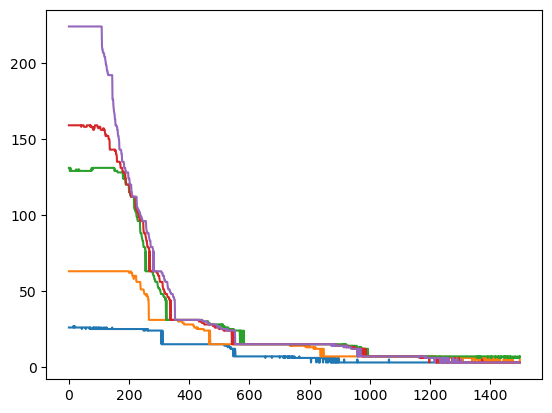

In [6]:
for i in range(len(h)):
    plt.plot(data[i])

In [7]:
def f1(x):
    a=2.921
    b=0.656
    return a*np.pow(x,b)

def f(x):
    a=0.38856826
    b=16.72267451
    return a*x+b
data=[f(d) for d in data]

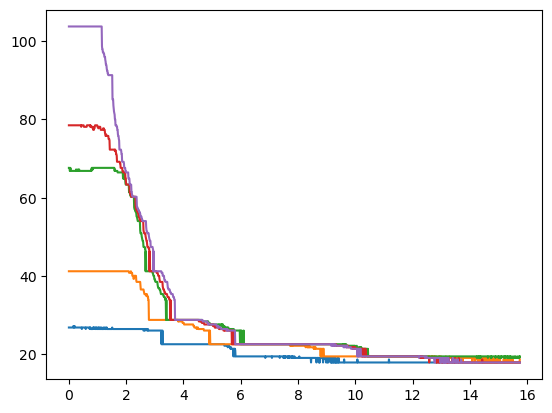

In [8]:
for i in range(len(h)):
    plt.plot(np.arange(0,data[i].shape[0])*0.0105,data[i])

In [66]:
pers=np.zeros(len(h), dtype=np.int32)
for i in range(len(h)):
    for j in range(1500):
        if np.abs(data[i][j]-data[i][0])>5:
            pers[i]=j-1
            break
print(pers*0.0105)

[5.5335 2.604  2.0895 1.4175 1.1445]


In [67]:
def getkb(X,Y):
    k=(np.average(Y*X)-np.average(Y)*np.average(X))/(np.average(X*X)-np.average(X)**2)
    b=np.average(Y)-k*np.average(X)
    def av(n):
        return np.average(n)
    sigk=0
    sigb=0
    #sigk=np.sqrt((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k)/np.sqrt(X.shape[0])
    #sigb=sigk*np.sqrt(av(X*X)-av(X)**2)
    return k,b,sigk,sigb


535.8370184780127 527
234.6314171816095 248
185.62956710745698 199
109.02266410103869 135
94.7321079839183 109


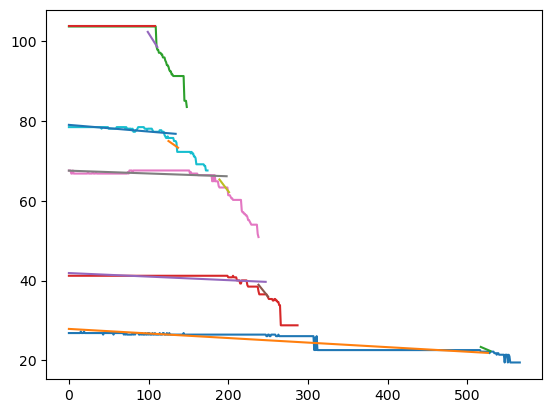

In [68]:
for i in range(len(h)):
    k1,b1,_,_=getkb(np.arange(0,pers[i]),data[i][0:pers[i]])
    k2,b2,_,_=getkb(np.arange(pers[i],pers[i]+40),data[i][pers[i]:pers[i]+40])
    plt.plot(data[i][0:pers[i]+40])
    plt.plot(np.arange(0,pers[i])*k1+b1)
    plt.plot(np.arange(pers[i]-10,pers[i]+3),np.arange(pers[i]-10,pers[i]+3)*k2+b2)
    print(np.dot(np.linalg.inv(np.array([[k1,-1],[k2,-1]])),np.array([-b1,-b2]))[0],pers[i])
    pers[i]=np.dot(np.linalg.inv(np.array([[k1,-1],[k2,-1]])),np.array([-b1,-b2]))[0]

In [69]:
vel=1.27/(pers*0.0105)
vel

array([0.22607922, 0.51689052, 0.65379665, 1.10965487, 1.28672746])

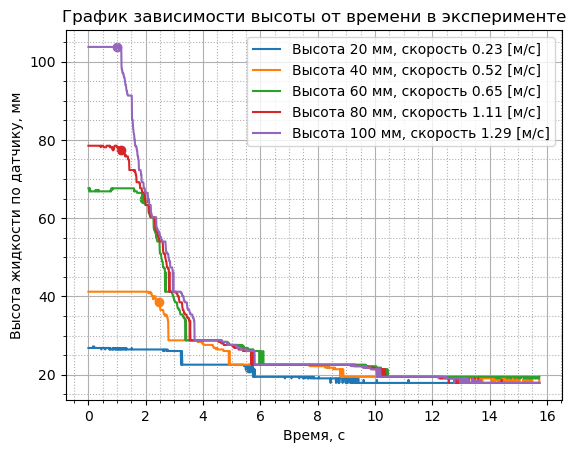

In [70]:
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.minorticks_on()

plt.xlabel('Время, с')
plt.ylabel('Высота жидкости по датчику, мм')
plt.title('График зависимости высоты от времени в эксперименте')

for i in range(len(h)):
    plt.scatter(pers[i]*0.0105,data[i][pers[i]])
for i in range(len(h)):
    plt.plot(np.arange(0,data[i].shape[0])*0.0105,data[i], label="Высота {0} мм, скорость {1:.2f} [м/с]".format(h[i],vel[i]))

plt.legend()

plt.savefig('hgT.svg')

In [71]:
X=np.array([np.log(data[i][0]/1000) for i in range(len(h))])
k,b,sigk,sigb=getkb(X,np.log(vel))
k,b,sigk,sigb

(np.float64(1.2473136886075198), np.float64(3.1271118795979262), 0, 0)

In [72]:
np.exp(b/k),1/k

(np.float64(12.269019387451435), np.float64(0.8017229419781189))

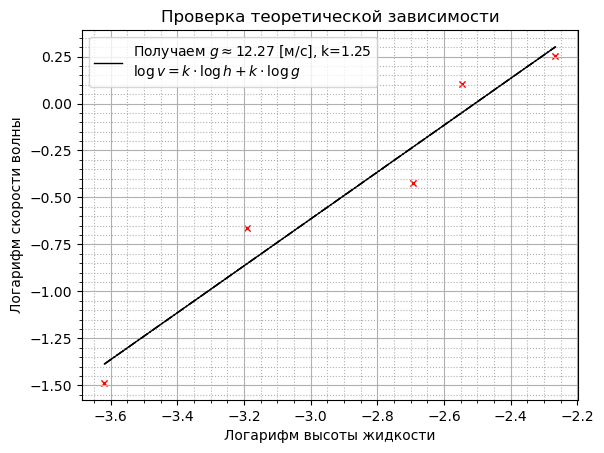

In [73]:
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.minorticks_on()

plt.xlabel('Логарифм высоты жидкости')
plt.ylabel('Логарифм скорости волны')
plt.title('Проверка теоретической зависимости')

for i in range(len(h)):
    plt.scatter(np.log(data[i][0]/1000),np.log(vel[i]),20, marker='x',c='r',linewidths=1)
#x=[np.log(data[0][0]),np.log(data[4][0])]
#y=[np.log(vel[0]),np.log(vel[4])]
plt.plot(X,k*X+b,'black', linewidth=1, label=r'Получаем $g\approx$'+'{0:.2f} [м/с], k={1:.2f}'.format(np.exp(b/k),k)+'\n'+r'$\log{v}=k\cdot\log{h}+k\cdot\log{g}$')
plt.plot(X,(k-sigk)*X+b-sigb,'black', linewidth=1, linestyle='-.')# linestyle=(0, (3, 10, 1, 10)))
plt.plot(X,(k+sigk)*X+b+sigb,'black', linewidth=1, linestyle='-.')# linestyle=(0, (3, 10, 1, 10)))

plt.legend()

plt.savefig('hgTtheory.svg')